In [1]:
import os
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib notebook

In [87]:
main_path = r'C:\Users\juro\uni\01\zaklady_programovania\semestralna_praca\seizure_detection\seizure_detection\seizure_detection\scripts'
TEST_FILES_PATH = os.path.join(main_path, 'data/test_files')
TEST_FILES_LABELS_PATH = os.path.join(TEST_FILES_PATH, 'labels')
RESULT = os.path.join(main_path, 'results')
freq = 173.61
file_name = 'test_file_0.csv'
file_length = 4097
predictions_file = 'test_file5_0.csv'

[[0 0 0 ... 1 1 1]]
[20485, 24582, 53261, 65552, 73746, 77843, 81940]


<IPython.core.display.Javascript object>


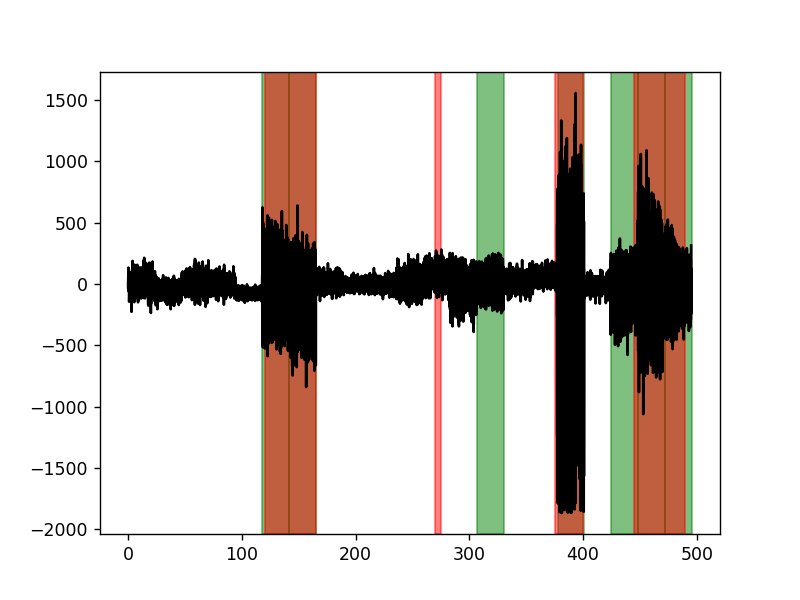

[20832 20833 20834 ... 85061 85062 85063]
[20831, 46872, 65100, 77252]
[7812, 867, 4339, 7811]


In [88]:
df = pd.read_csv(os.path.join(RESULT, predictions_file), dtype=float, header=None)
labels = pd.read_csv(os.path.join(TEST_FILES_LABELS_PATH, file_name), dtype=int, header=None)
print(labels.values.T)
labels, indexes = np.nonzero(labels.values.T)

true_labels = [indexes[i*file_length] for i in range(int(len(indexes)/file_length))]
print(true_labels)

plt.plot(np.linspace(0, int(df.shape[0]/freq), df.shape[0] ), df[0], color='black')

for i in range(len(true_labels)):
    plt.axvspan(true_labels[i]/freq, (true_labels[i]/freq +file_length/freq), alpha=0.5, color='g')
    
prediction_labels = df[1].dropna()
prediction_labels, _prediction_indexes = np.nonzero([prediction_labels.values])
print(_prediction_indexes)

prev = _prediction_indexes[0] - 1 
prediction_indexes = [prev]
lengths = []
l = 0
for i in range(len(_prediction_indexes)):
    if _prediction_indexes[i] != prev +1:
        prediction_indexes.append(_prediction_indexes[i])
        lengths.append(l)
        l = 0
    else:
        l+=1
    prev = _prediction_indexes[i]
lengths.append(l)

print(prediction_indexes)
print(lengths)
    
for i in range(len(prediction_indexes)):
    plt.axvspan(prediction_indexes[i]/freq, (prediction_indexes[i]/freq +lengths[i]/freq), alpha=0.5, color='r')